In [12]:
import pandas as pd

df = pd.read_csv('IMDBMovies_RATING-PREDICTION.csv', encoding='latin1')
df 

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()

Year         528
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [13]:
drop_columns = ['Name','Duration']
df = df.drop(columns=drop_columns,axis=1)

In [17]:
df.value_counts()

Year  Genre                      Rating  Votes  Director                 Actor 1               Actor 2              Actor 3               
1917  Adventure, Drama, Fantasy  6.7     22     Dhundiraj Govind Phalke  Anna Salunke          Ganpat G. Shinde     D.D. Dabke                1
2006  History                    6.6     9      Jaswinder Chahal         Deep Dhillon          Jaswant Saggo Jas    Kashish                   1
      Thriller                   4.7     43     Karan Razdan             Mahima Chaudhry       Padmini Kolhapure    Shakti Kapoor             1
                                 3.2     9      Shivram Yadav            Sameer Dharmadhikari  Gurpreet kaur Sodhi  Gurpreet Singh            1
      Romance                    6.7     35     Mustafa Engineer         Somesh Agarwal        Shahib Chopra        Kannu Gill                1
                                                                                                                                             

In [16]:
df['Year'] = df['Year'].str.extract('(\d+)').fillna(0).astype(float).astype(int)

In [23]:
non_NA_df = df[~df['Rating'].isna()]
NA_df = df[df['Rating'].isna()]

In [24]:
NA_df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,2021,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,2010,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
7,2008,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
14,1990,Thriller,NaN,NaN,Harish,Saraswati,Disco Shanti,NaN
...,...,...,...,...,...,...,...,...
15499,1995,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,1993,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15502,1979,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15506,2005,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN


In [29]:
df = non_NA_df
df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...
15501,1992,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,1989,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,1988,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,1999,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [55]:
df.isna().sum()

Year        0
Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [33]:
df = df.dropna()

In [36]:
df.value_counts().sum()

7558

In [27]:
NA_df.isna().sum()

Year           0
Genre       1775
Rating      7590
Votes       7589
Director     520
Actor 1     1492
Actor 2     2184
Actor 3     2852
dtype: int64

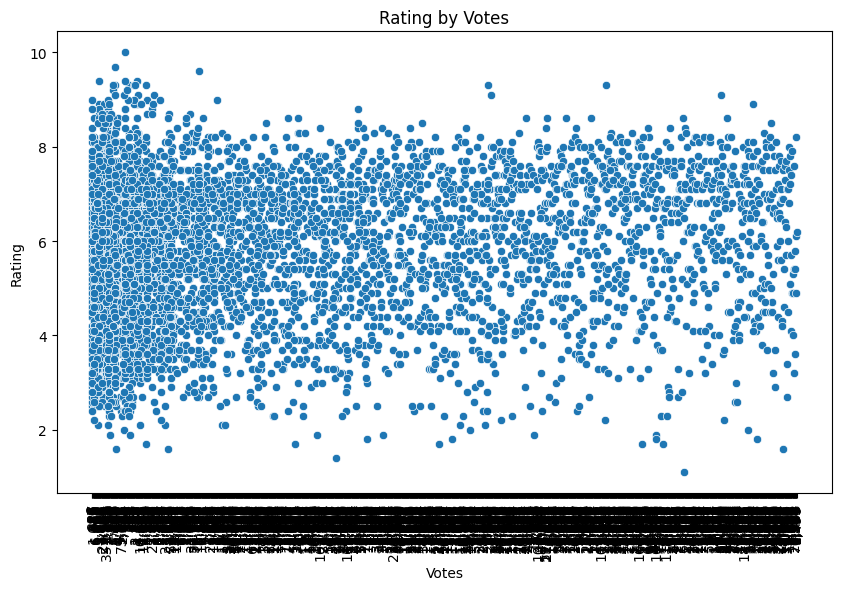

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Rating', legend='full')
plt.title('Rating by Votes')
plt.xlabel('Votes')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.show()

In [53]:
drop_columns = ['Votes']
df = df.drop(columns=drop_columns,axis=1)

In [54]:
df.value_counts()

Year  Genre                      Rating  Director                 Actor 1               Actor 2              Actor 3               
1917  Adventure, Drama, Fantasy  6.7     Dhundiraj Govind Phalke  Anna Salunke          Ganpat G. Shinde     D.D. Dabke                1
2006  History                    6.6     Jaswinder Chahal         Deep Dhillon          Jaswant Saggo Jas    Kashish                   1
      Thriller                   4.7     Karan Razdan             Mahima Chaudhry       Padmini Kolhapure    Shakti Kapoor             1
                                 3.2     Shivram Yadav            Sameer Dharmadhikari  Gurpreet kaur Sodhi  Gurpreet Singh            1
      Romance                    6.7     Mustafa Engineer         Somesh Agarwal        Shahib Chopra        Kannu Gill                1
                                                                                                                                      ..
1985  Drama, Thriller            5.3     Dev A

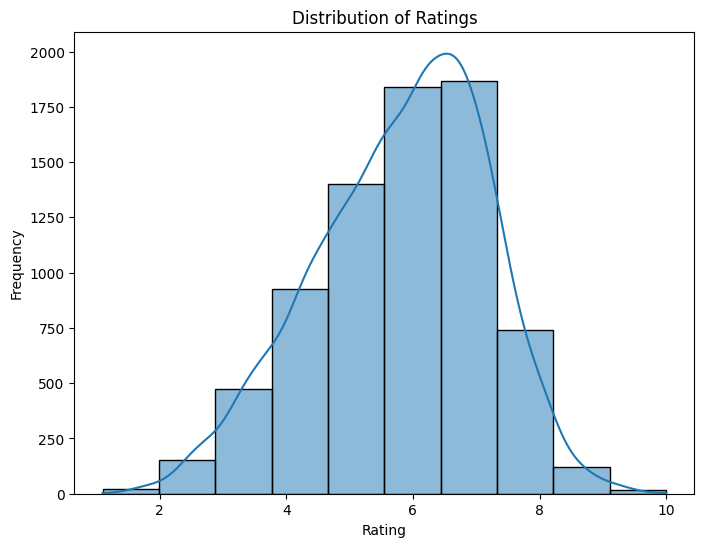

In [73]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


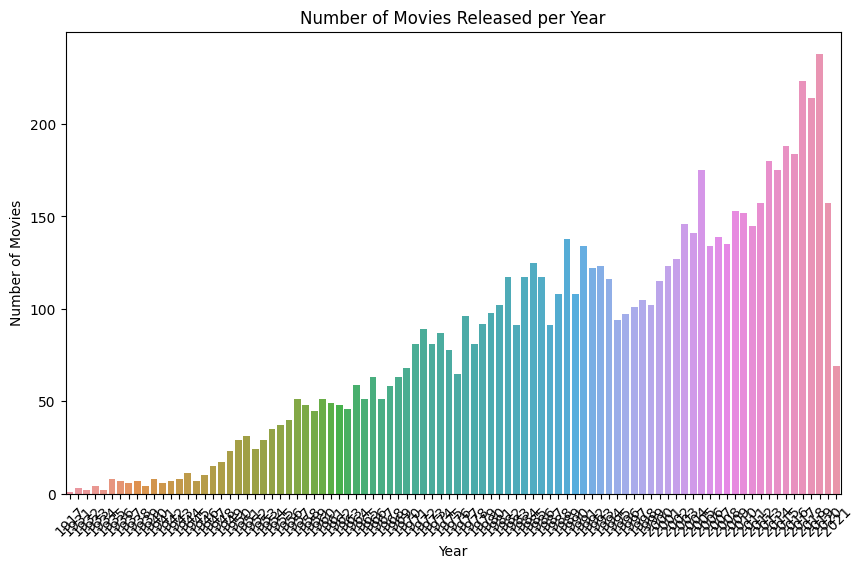

In [74]:
year_counts = df['Year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Number of Movies']

# Plot a bar chart of the number of movies per year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Number of Movies', data=year_counts)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

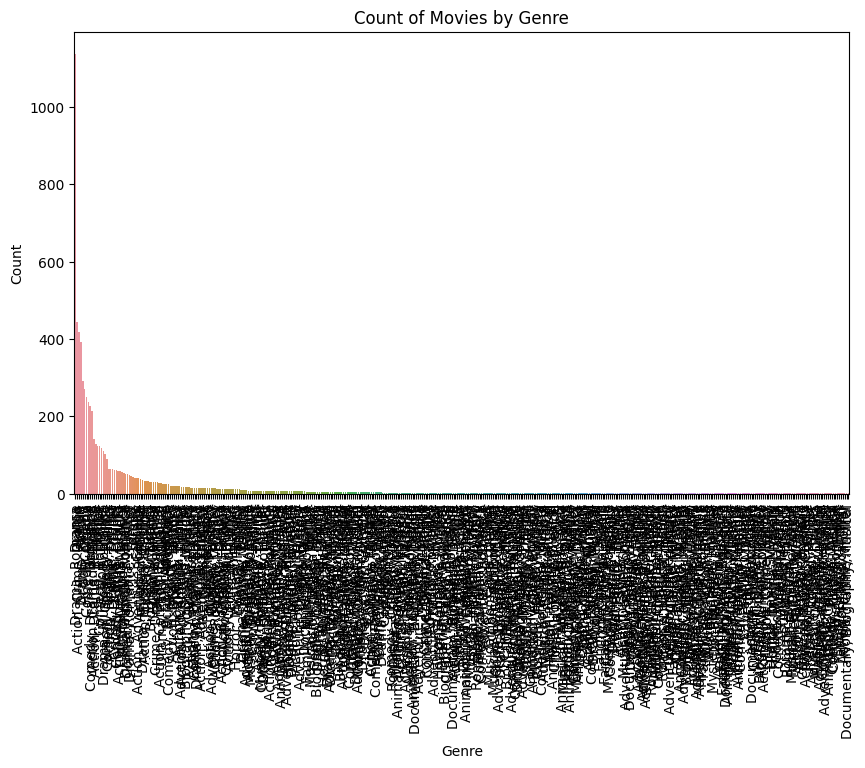

c:\Users\hp2023\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


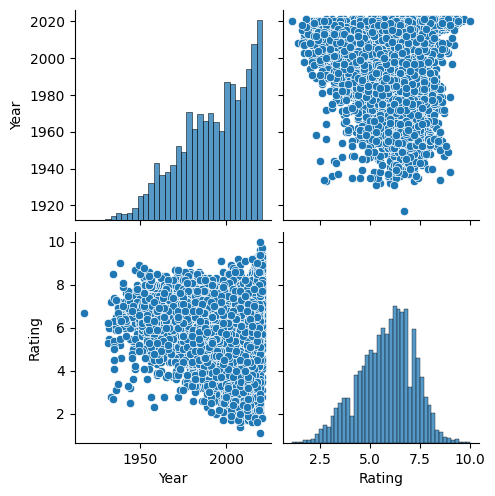

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Count of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Create a pair plot to visualize relationships between numerical columns
sns.pairplot(df[['Year', 'Rating']])
plt.show()

In [72]:
print(df.describe())

            Rating
count  7558.000000
mean      5.811127
std       1.368255
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


ML

In [84]:
df.value_counts()

Year  Genre                      Rating  Director                 Actor 1               Actor 2              Actor 3               
1917  Adventure, Drama, Fantasy  6.7     Dhundiraj Govind Phalke  Anna Salunke          Ganpat G. Shinde     D.D. Dabke                1
2006  History                    6.6     Jaswinder Chahal         Deep Dhillon          Jaswant Saggo Jas    Kashish                   1
      Thriller                   4.7     Karan Razdan             Mahima Chaudhry       Padmini Kolhapure    Shakti Kapoor             1
                                 3.2     Shivram Yadav            Sameer Dharmadhikari  Gurpreet kaur Sodhi  Gurpreet Singh            1
      Romance                    6.7     Mustafa Engineer         Somesh Agarwal        Shahib Chopra        Kannu Gill                1
                                                                                                                                      ..
1985  Drama, Thriller            5.3     Dev A

In [85]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate features (X) and target (y)
X = df[['Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

# Perform one-hot encoding for categorical variables (Genre, Director, Actor 1, Actor 2, Actor 3)
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']])

# Get the column names of the one-hot encoded features
encoded_feature_names = encoder.get_feature_names_out(input_features=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

# Combine one-hot encoded features with numerical features (Year, Rating)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


c:\Users\hp2023\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 1.557911623240925
R-squared: 0.1591752020817253


**Without Year**

In [86]:
# Separate features (X) and target (y)
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

# Perform one-hot encoding for categorical variables (Genre, Director, Actor 1, Actor 2, Actor 3)
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']])

# Get the column names of the one-hot encoded features
encoded_feature_names = encoder.get_feature_names_out(input_features=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

# Combine one-hot encoded features with numerical features (Year, Rating)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


c:\Users\hp2023\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 1.557911623240925
R-squared: 0.1591752020817253
